In [162]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tsf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [163]:
# Task 1: Data Exploration and Preprocessing
data = pd.read_csv('Alphabets_data.csv')

In [164]:
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [166]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [167]:
count = data['letter'].value_counts()
letters = np.unique(data['letter'])
letters

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [168]:
count

,count
letter,
U,813
D,805
P,803
T,796
M,792
A,789
X,787
Y,786
N,783


In [169]:
# Normalize data
scaler = StandardScaler()
data[['xbox',	'ybox',	'width',	'height',	'onpix',	'xbar',	'ybar',	'x2bar',	'y2bar',	'xybar',	'x2ybar',	'xy2bar',	'xedge',	'xedgey',	'yedge',	'yedgex']] = scaler.fit_transform(data[['xbox',	'ybox',	'width',	'height',	'onpix',	'xbar',	'ybar',	'x2bar',	'y2bar',	'xybar',	'x2ybar',	'xy2bar',	'xedge',	'xedgey',	'yedge',	'yedgex']])
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911
1,I,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441
2,D,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176
3,N,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911
4,G,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441


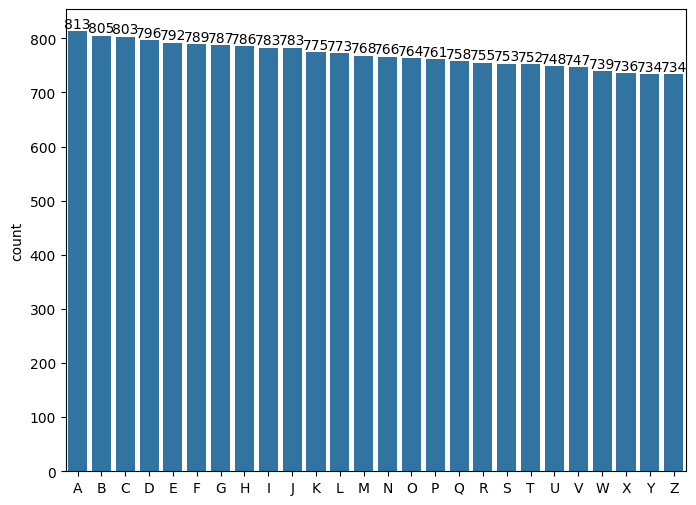

In [170]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=letters, y=count, estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);

In [171]:
# Task 2: Model Implementation
X = data.drop('letter', axis=1)
y = data['letter']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [172]:
X_train

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
5894,-0.012309,-0.010743,-0.060486,-0.164704,0.225598,-0.443044,-0.215220,-0.603207,0.765028,1.092242,0.587608,0.514764,-0.019764,-0.219082,0.120081,0.122911
3728,-0.012309,-0.010743,0.435910,-0.164704,0.682135,-0.443044,0.214833,-0.603207,0.765028,1.092242,0.587608,0.514764,-0.019764,-0.219082,0.120081,-0.495354
8958,-0.535004,-0.615983,-0.556881,-1.049137,-0.230939,0.050543,0.214833,0.137561,-0.075039,-0.515208,0.207525,-0.927151,0.837691,0.427463,-0.659036,-1.113619
7671,-0.012309,0.897117,0.435910,0.719730,1.138672,-0.936631,-0.215220,0.137561,0.765028,-0.917071,-0.172558,1.956678,-0.019764,-0.219082,0.899198,0.741176
5999,-0.012309,0.897117,0.435910,1.161947,0.225598,0.544130,1.504991,-0.973591,-0.915106,-1.720796,1.347774,0.514764,-0.019764,1.720552,-1.048594,0.122911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.510385,1.199738,-0.556881,0.277513,-0.230939,0.050543,-0.215220,-0.232823,-0.915106,0.288517,-0.172558,-0.446513,-0.019764,1.074008,1.678316,-0.495354
11964,-0.535004,-0.010743,-0.060486,-0.164704,0.225598,1.037718,1.504991,0.507945,-0.495072,-0.917071,-0.552641,-0.446513,-0.448492,-0.219082,0.899198,-2.350149
5390,-0.535004,-0.918603,0.435910,-1.049137,-0.687476,1.037718,-0.645273,-0.973591,1.185061,0.690380,-1.312807,-0.446513,-0.448492,-0.865626,-0.269477,0.741176
860,-0.535004,0.291877,-0.556881,0.277513,-0.687476,0.050543,0.214833,-1.714360,1.185061,2.297830,-0.172558,-0.927151,-1.305948,-0.219082,-1.048594,-0.495354


<Axes: >

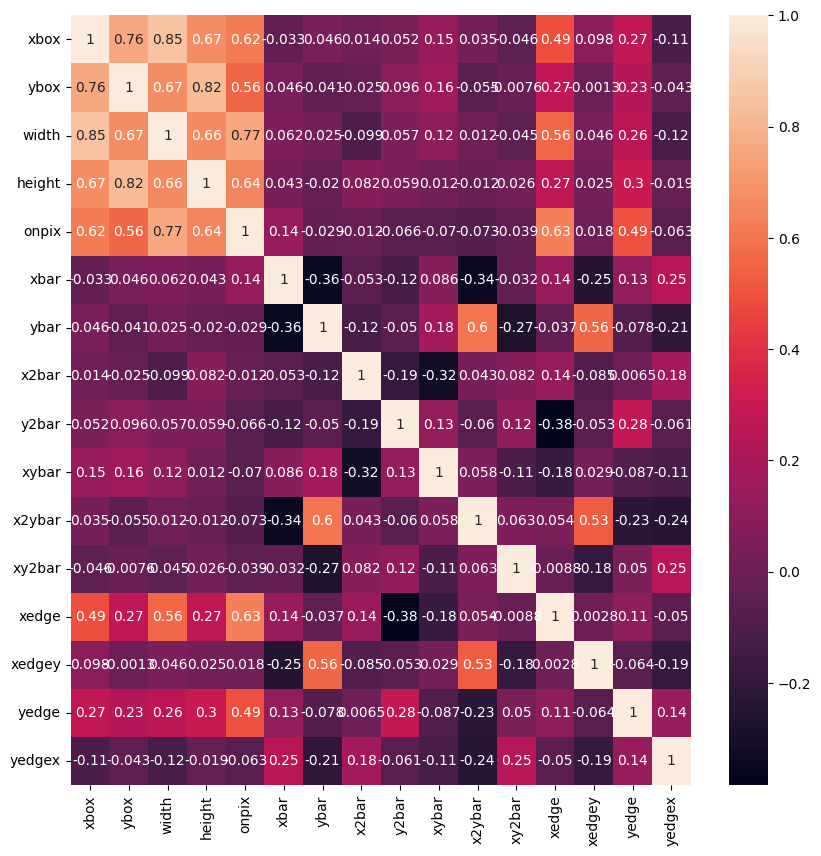

In [173]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(), annot=True)

In [174]:

# Create a mapping of letters to integers
letter_to_int = {chr(i+65):i for i in range(26)}

# Convert letters in y_train and y_test to integers
y_train = np.array([letter_to_int[letter] for letter in y_train])
y_test = np.array([letter_to_int[letter] for letter in y_test])

# Convert target variables to categorical using one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=26)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=26)

In [175]:
#building the sequential model with keras
model = Sequential()
model.add(Dense(12,activation='relu',input_shape=(16,)))
model.add(Dense(26,activation='softmax',))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 26)                  │             338 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542 (2.12 KB)

 Trainable params: 542 (2.12 KB)

 Non-trainable params: 0 (0.00 B)

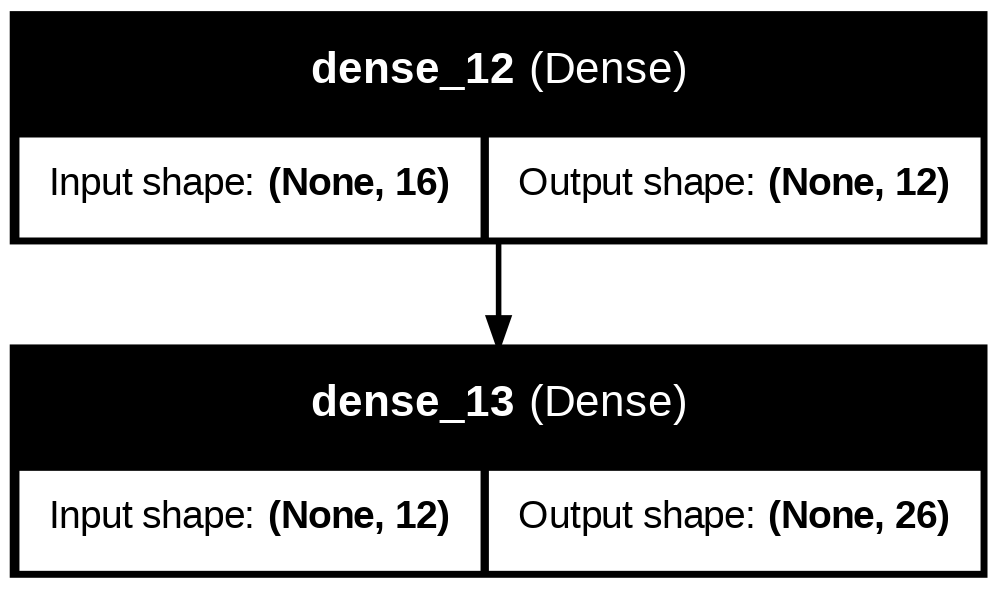

In [176]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [177]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

In [178]:
dlmodel = model.fit(X_train,y_train,epochs=20,batch_size=250,validation_data=(X_test,y_test))

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0596 - loss: 3.3545 - val_accuracy: 0.1110 - val_loss: 3.1360
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1370 - loss: 3.0742 - val_accuracy: 0.2085 - val_loss: 2.8853
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2274 - loss: 2.8197 - val_accuracy: 0.2765 - val_loss: 2.6215
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2900 - loss: 2.5576 - val_accuracy: 0.3602 - val_loss: 2.3642
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3757 - loss: 2.3024 - val_accuracy: 0.4355 - val_loss: 2.1374
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4321 - loss: 2.1016 - val_accuracy: 0.4695 - val_loss: 1.9469
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4773 - loss: 1.9132 - val_accuracy: 0.5060 - val_loss: 1.7893
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5119 - loss: 1.7636 - val_accuracy: 0.5472 - val_loss:

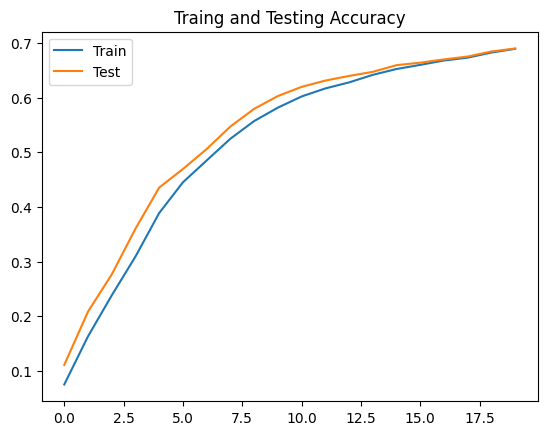

In [179]:
plt.plot(range(20),dlmodel.history['accuracy'],label='Train')
plt.plot(range(20),dlmodel.history['val_accuracy'],label='Test')
plt.title('Traing and Testing Accuracy')
plt.legend(loc='best')

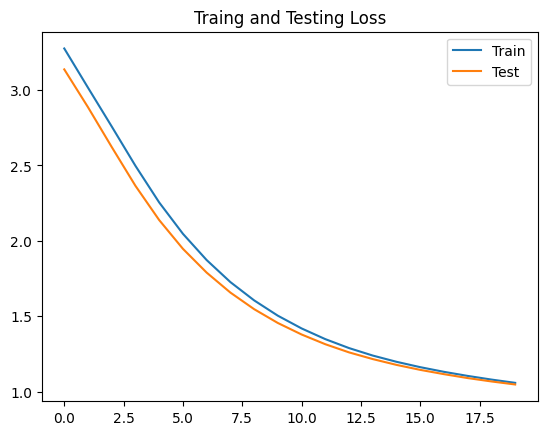

In [180]:
plt.plot(range(20),dlmodel.history['loss'],label='Train')
plt.plot(range(20),dlmodel.history['val_loss'],label='Test')
plt.title('Traing and Testing Loss')
plt.legend(loc='best')

In [181]:
y_pred = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [182]:
np.argmax(y_pred[8])

6

In [183]:
np.argmax(y_test[8])

6

In [186]:
# Task 4: Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       149
           1       0.62      0.73      0.67       153
           2       0.72      0.68      0.70       137
           3       0.61      0.80      0.69       156
           4       0.75      0.67      0.71       141
           5       0.71      0.72      0.72       140
           6       0.53      0.44      0.48       160
           7       0.33      0.17      0.22       144
           8       0.87      0.76      0.81       146
           9       0.82      0.75      0.79       149
          10       0.60      0.67      0.63       130
          11       0.81      0.81      0.81       155
          12       0.82      0.86      0.84       168
          13       0.66      0.68      0.67       151
          14       0.77      0.57      0.66       145
          15       0.80      0.82      0.81       173
          16       0.66      0.69      0

<Axes: >

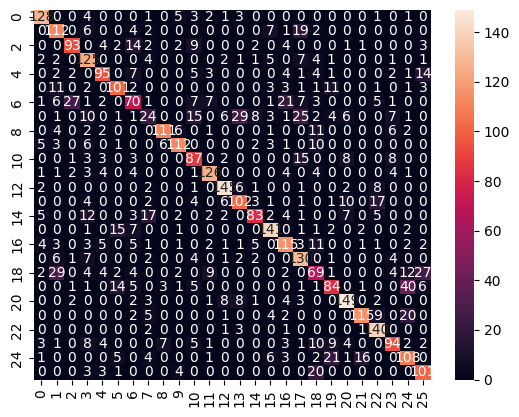

In [187]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')